# Estimate global horizontal irradiance under clear sky
Estimation of global horizontal irradiance (ghi) under clear sky using [**pvlib**](https://pvlib-python.readthedocs.io/en/stable/index.html).<br>
**Author: Jun Sasaki@UTokyo, coded on February 15, 2022, updated on February 15, 2022**<br>
- Installation: `conda install -c pvlib pvlib`

In [1]:
import os
import itertools
import matplotlib.pyplot as plt
import pandas as pd
#import pvlib
from pvlib import clearsky, atmosphere, solarposition
from pvlib.location import Location
#from pvlib.iotools import read_tmy3
from metdata import gwo

## Location
- `location.Location(latitude, longitude, tz, altitude, name)`
- `tz='Asia/Tokyo'`: timezone

Text(0.5, 1.0, 'Tokyo: climatological turbidity')

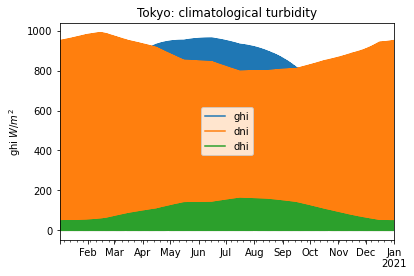

In [2]:
stn = gwo.Stn().values("東京")
tokyo = Location(stn['latitude'], stn['longitude'], 'Asia/Tokyo', stn['altitude']+stn['anemometer_height'], 'Tokyo')
times = pd.date_range(start='2020-01-01 01:00:00', end='2021-01-01 00:00:00', freq='1H', tz=tokyo.tz)
cs = tokyo.get_clearsky(times)
cs.plot()
plt.ylabel('ghi $W/m^2$')
plt.title('Tokyo: climatological turbidity')

In [3]:
cs[['ghi']]

,ghi
2020-01-01 01:00:00+09:00,0.0
2020-01-01 02:00:00+09:00,0.0
2020-01-01 03:00:00+09:00,0.0
2020-01-01 04:00:00+09:00,0.0
2020-01-01 05:00:00+09:00,0.0
...,...
2020-12-31 20:00:00+09:00,0.0
2020-12-31 21:00:00+09:00,0.0
2020-12-31 22:00:00+09:00,0.0
2020-12-31 23:00:00+09:00,0.0


## Creating a mask for nighttime
- mask = True (nighttime) or False (daytime)

In [4]:
mask = (cs['ghi']==0).values
mask

array([ True,  True,  True, ...,  True,  True,  True])